In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import eda


plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
% load_ext giphy_magic

The giphy_magic extension is already loaded. To reload it, use:
  %reload_ext giphy_magic


In [40]:
train = pd.read_csv('assets/clean_train.csv', index_col=0)
weath = pd.read_csv('assets/weather.csv', index_col=0)
test = pd.read_csv('assets/test.csv', index_col=0)
spray = pd.read_csv('assets/newspray.csv', index_col=0)


In [41]:
train.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [42]:
train['Date'] = train.index


In [43]:
weath

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Station,,,,,,,,,,,,,,,,,,,,,
1,2007-05-01,83,50,67,14,51,56,0,2,0448,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
2,2007-05-01,84,52,68,M,51,57,0,3,-,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51,-3,42,47,14,0,0447,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,2007-05-02,60,43,52,M,42,47,13,0,-,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
1,2007-05-03,66,46,56,2,40,48,9,0,0446,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
2,2007-05-03,67,48,58,M,40,50,7,0,-,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
1,2007-05-04,66,49,58,4,41,50,7,0,0444,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
2,2007-05-04,78,51,M,M,42,50,M,M,-,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
1,2007-05-05,66,53,60,5,38,49,5,0,0443,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0


In [21]:
spray

,Date,Time,Latitude,Longitude,full_date,coordinates,address
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29 18:56:58,"42.3916233333, -88.0891633333","Ridgewood Lane, Lake Villa, Lake County, Illin..."
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29 18:57:08,"42.3913483333, -88.0891633333","Ridgewood Lane, Lake Villa, Lake County, Illin..."
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29 18:57:18,"42.3910216667, -88.0891566667","Ridgewood Lane, Lake Villa, Lake County, Illin..."
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29 18:57:28,"42.3906366667, -88.0891583333","Ridgewood Lane, Lake Villa, Lake County, Illin..."
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29 18:57:38,"42.39041, -88.0888583333","Ridgewood Lane, Lake Villa, Lake County, Illin..."
5,2011-08-29,6:57:48 PM,42.390395,-88.088315,2011-08-29 18:57:48,"42.390395, -88.088315","Beverly Drive, Lake Villa, Lake County, Illino..."
6,2011-08-29,6:57:58 PM,42.390673,-88.088002,2011-08-29 18:57:58,"42.3906733333, -88.0880016667","Beverly Drive, Lake Villa, Lake County, Illino..."
7,2011-08-29,6:58:08 PM,42.391027,-88.088002,2011-08-29 18:58:08,"42.3910266667, -88.0880016667","Beverly Drive, Lake Villa, Lake County, Illino..."
8,2011-08-29,6:58:18 PM,42.391403,-88.088003,2011-08-29 18:58:18,"42.3914033333, -88.0880033333","Beverly Drive, Lake Villa, Lake County, Illino..."
9,2011-08-29,6:58:28 PM,42.391718,-88.087995,2011-08-29 18:58:28,"42.3917183333, -88.087995","Beverly Drive, Lake Villa, Lake County, Illino..."


In [44]:
weath_train = pd.merge(weath, train, on='Date', how='inner')

In [45]:
eda.eda(weath_train)

missing values 
Date                      0
Tmax                      0
Tmin                      0
Tavg                      0
Depart                    0
DewPoint                  0
WetBulb                   0
Heat                      0
Cool                      0
Sunrise                   0
Sunset                    0
CodeSum                   0
Depth                     0
Water1                    0
SnowFall                  0
PrecipTotal               0
StnPressure               0
SeaLevel                  0
ResultSpeed               0
ResultDir                 0
AvgSpeed                  0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
dataframe index 
Int64Index([    0,     1,     2,     3,     4,     5,     

In [46]:
Tavg, WetBulb, Heat, Cool, Sunset, Depth, SnowFall, PrecipTotal , StnPressure, SeaLevel, AvgSpeed

NameError: name 'Tavg' is not defined

In [47]:
weath_train.Tavg = weath_train.Tavg.astype(float)

weath_train.Heat = weath_train.Heat.astype(float)
weath_train.Cool = weath_train.Cool.astype(float)
weath_train.SeaLevel = weath_train.SeaLevel.astype(float)
weath_train.AvgSpeed = weath_train.AvgSpeed.astype(float)

In [48]:
weath_train.StnPressure = weath_train.StnPressure.map({'M': 0})

weath_train.StnPressure = weath_train.StnPressure.astype(float)

In [49]:
weath_train.WetBulb = weath_train.WetBulb.map({'M': 0})

weath_train.WetBulb = weath_train.WetBulb.astype(float)

In [50]:
weath_train.Sunset = weath_train.Sunset.map({'-': 0})

weath_train.Sunset = weath_train.Sunset.astype(float)

In [51]:
## M = 1
weath_train.Depth = weath_train.Depth.map({'-': 0})

weath_train.Depth = weath_train.Depth.astype(float)

In [52]:
## T = 0, M = 0
weath_train.PrecipTotal = weath_train.PrecipTotal.map({'M': 0, 'T': 0})

weath_train.PrecipTotal = weath_train.PrecipTotal.astype(float)

In [ ]:
weath_train.columns

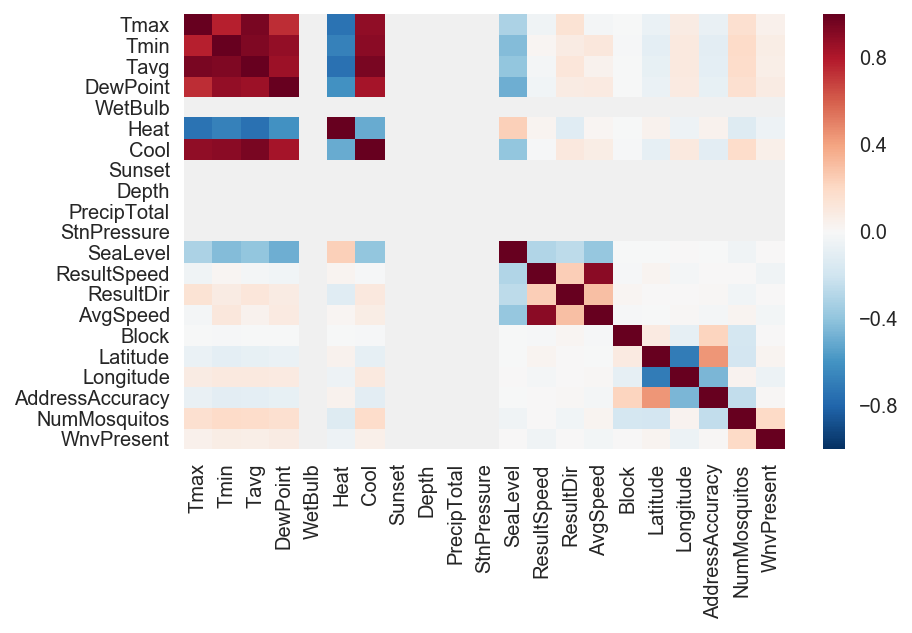

In [58]:
sns.heatmap(weath_train.corr())